<a href="https://colab.research.google.com/github/radhika1603/Radhika_Mundhra_INCLASS_Assignemnt_JIO_INSTUTUTE/blob/main/Ordersipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load dataset
file_path = "/content/ORDERS.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Convert date columns to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'], errors='coerce')

# 7. Customer Churn Analysis
cutoff_date = df['ORDERDATE'].max() - timedelta(days=180)  # 6 months inactivity
df_churn = df.groupby('CUSTOMERNAME')['ORDERDATE'].max().reset_index()
df_churn['Churned'] = df_churn['ORDERDATE'] < cutoff_date

# 8. Inventory Management Analysis
product_sales = df.groupby('PRODUCTNAME')['ORDERQUANTITY'].sum().reset_index()
product_sales = product_sales.sort_values(by='ORDERQUANTITY', ascending=False)

# 9. Order Fulfillment Efficiency
df['ProcessingTime'] = (df['SHIPDATE'] - df['ORDERDATE']).dt.days
order_fulfillment = df[['ORDERID', 'ProcessingTime']].groupby('ORDERID').mean()

# 10. Cross-Selling & Upselling
cross_selling = df.groupby(['ORDERID'])['PRODUCTNAME'].apply(list)

# 11. Supplier Performance Analysis (No supplier data in dataset)
# Placeholder: Would evaluate suppliers based on delivery timeliness and quality

# 12. Return & Refund Analysis
# Assuming high return rates correlate with low profit margins
high_return_products = df[df['PROFIT'] < 0].groupby('PRODUCTNAME').size().reset_index(name='ReturnCount')
high_return_products = high_return_products.sort_values(by='ReturnCount', ascending=False)

# Display sample results
print("Customer Churn Analysis:\n", df_churn.head())
print("\nFast/Slow Moving Products:\n", product_sales.head())
print("\nOrder Fulfillment Efficiency:\n", order_fulfillment.head())
print("\nCross-Selling Analysis:\n", cross_selling.head())
print("\nHigh Return Products:\n", high_return_products.head())

<ipython-input-9-e091363e80d3>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
<ipython-input-9-e091363e80d3>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'], errors='coerce')


Customer Churn Analysis:
       CUSTOMERNAME  ORDERDATE  Churned
0    Aaron Bergman 2011-05-28     True
1    Aaron Hawkins 2011-12-29     True
2   Aaron Smayling 2012-01-19     True
3  Adam Bellavance 2012-10-02    False
4        Adam Hart 2012-12-11    False

Fast/Slow Moving Products:
                                          PRODUCTNAME  ORDERQUANTITY
557        Global High-Back Leather Tilter, Burgundy            666
260                  Bevis 36 x 72 Conference Tables            619
1110     Wilson Jones Hanging View Binder, White, 1"            585
565   Global TroyÈ Executive Leather Low-Back Tilter            550
749                     Memorex 4.7GB DVD+RW, 3/Pack            546

Order Fulfillment Efficiency:
          ProcessingTime
ORDERID                
3                   7.0
6                   1.0
32                  1.5
35                  1.5
36                  0.0

Cross-Selling Analysis:
 ORDERID
3     [Eldon Base for stackable storage shelf, plati...
6     [Kleenc

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Orders Data
orders = pd.read_csv("/content/ORDERS.csv", encoding='ISO-8859-1')

# Display column names to verify available fields
print("Available Columns:", orders.columns)

# Ensure required columns exist before proceeding
required_columns = ['Quantity', 'UnitPrice', 'CostPrice', 'CustomerID', 'Region', 'ShippingMode', 'Discount', 'OrderDate', 'ShipDate', 'ProductID', 'ProductCategory', 'Supplier', 'ReturnStatus']
missing_columns = [col for col in required_columns if col not in orders.columns]

if missing_columns:
    print(f"Missing Columns: {missing_columns}")
else:
    # 1. Sales Performance Analysis
    orders['Total_Sales'] = orders['Quantity'] * orders['UnitPrice']
    plt.figure(figsize=(10, 5))
    sns.barplot(x=orders.groupby('ProductID')['Total_Sales'].sum().nlargest(10).index,
                y=orders.groupby('ProductID')['Total_Sales'].sum().nlargest(10).values,
                palette='viridis')
    plt.title("Top 10 Best-Selling Products")
    plt.xlabel("Product ID")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

    # 2. Profitability Analysis
    orders['Profit'] = orders['Total_Sales'] - (orders['CostPrice'] * orders['Quantity'])
    top_profitable_products = orders.groupby('ProductID')['Profit'].sum().nlargest(10)
    plt.figure(figsize=(10, 5))
    top_profitable_products.plot(kind='bar', color='green')
    plt.title("Top 10 Most Profitable Products")
    plt.xlabel("Product ID")
    plt.ylabel("Total Profit")
    plt.show()

    # 3. Customer Segmentation
    customer_spending = orders.groupby('CustomerID')['Total_Sales'].sum().nlargest(10)
    plt.figure(figsize=(10, 5))
    customer_spending.plot(kind='bar', color='blue')
    plt.title("Top 10 High-Value Customers")
    plt.xlabel("Customer ID")
    plt.ylabel("Total Spending")
    plt.show()

    # 4. Regional Sales Analysis
    regional_sales = orders.groupby('Region')['Total_Sales'].sum()
    plt.figure(figsize=(10, 5))
    regional_sales.plot(kind='bar', color='purple')
    plt.title("Sales by Region")
    plt.xlabel("Region")
    plt.ylabel("Total Sales")
    plt.show()

    # 5. Shipping Performance Analysis
    shipping_mode_count = orders['ShippingMode'].value_counts()
    plt.figure(figsize=(8, 5))
    shipping_mode_count.plot(kind='bar', color='red')
    plt.title("Shipping Mode Popularity")
    plt.xlabel("Shipping Mode")
    plt.ylabel("Count")
    plt.show()

    # 6. Discount Impact Analysis
    discount_impact = orders.groupby('Discount')['Total_Sales'].sum()
    plt.figure(figsize=(10, 5))
    discount_impact.plot(kind='bar', color='cyan')
    plt.title("Impact of Discounts on Sales")
    plt.xlabel("Discount Percentage")
    plt.ylabel("Total Sales")
    plt.show()

    # 7. Customer Churn Analysis
    orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')
    last_purchase = orders.groupby('CustomerID')['OrderDate'].max()
    inactive_customers = last_purchase[last_purchase < '2024-01-01'].count()
    print(f"Number of Inactive Customers (No Orders Since 2024): {inactive_customers}")

    # 8. Inventory Management
    fast_moving_products = orders.groupby('ProductID')['Quantity'].sum().nlargest(10)
    plt.figure(figsize=(10, 5))
    fast_moving_products.plot(kind='bar', color='gold')
    plt.title("Top 10 Fast-Moving Products")
    plt.xlabel("Product ID")
    plt.ylabel("Total Quantity Sold")
    plt.show()

    # 9. Order Fulfillment Efficiency
    orders['ShipDate'] = pd.to_datetime(orders['ShipDate'], errors='coerce')
    orders['Processing_Time'] = (orders['ShipDate'] - orders['OrderDate']).dt.days
    plt.figure(figsize=(8, 5))
    sns.histplot(orders['Processing_Time'], bins=20, kde=True, color='brown')
    plt.title("Order Processing Time Distribution")
    plt.xlabel("Processing Time (Days)")
    plt.ylabel("Order Count")
    plt.show()

    # 10. Cross-Selling & Upselling
    cross_selling = orders.groupby('ProductCategory')['Total_Sales'].sum()
    plt.figure(figsize=(10, 5))
    cross_selling.plot(kind='bar', color='teal')
    plt.title("Sales by Product Category")
    plt.xlabel("Product Category")
    plt.ylabel("Total Sales")
    plt.show()

    # 11. Supplier Performance Analysis
    supplier_performance = orders.groupby('Supplier')['Processing_Time'].mean().nsmallest(10)
    plt.figure(figsize=(10, 5))
    supplier_performance.plot(kind='bar', color='grey')
    plt.title("Top 10 Fastest Suppliers")
    plt.xlabel("Supplier")
    plt.ylabel("Average Processing Time (Days)")
    plt.show()

    # 12. Return & Refund Analysis
    return_rates = orders.groupby('ProductID')['ReturnStatus'].mean().nlargest(10)
    plt.figure(figsize=(10, 5))
    return_rates.plot(kind='bar', color='magenta')
    plt.title("Top 10 Most Returned Products")
    plt.xlabel("Product ID")
    plt.ylabel("Return Rate")
    plt.show()

Available Columns: Index(['ROWID', 'ORDERID', 'ORDERDATE', 'ORDERPRIOTORITY', 'ORDERQUANTITY',
       'SALES', 'DISCOUNT', 'SHIPMODE', 'PROFIT', 'UNITPRICE', 'SHIPPINGCOSTS',
       'CUSTOMERNAME', 'PROVINCE', 'REGION', 'CUSTOMERSEGMENT',
       'PRODUCTCATEGORY', 'PRODUCTSUBCATEGORY', 'PRODUCTNAME',
       'PRODUCTCONTAINER', 'PRODUCTBASEMARGIN', 'SHIPDATE', 'DATASET'],
      dtype='object')
Missing Columns: ['Quantity', 'UnitPrice', 'CostPrice', 'CustomerID', 'Region', 'ShippingMode', 'Discount', 'OrderDate', 'ShipDate', 'ProductID', 'ProductCategory', 'Supplier', 'ReturnStatus']


Available Columns: Index(['ROWID', 'ORDERID', 'ORDERDATE', 'ORDERPRIOTORITY', 'ORDERQUANTITY',
       'SALES', 'DISCOUNT', 'SHIPMODE', 'PROFIT', 'UNITPRICE', 'SHIPPINGCOSTS',
       'CUSTOMERNAME', 'PROVINCE', 'REGION', 'CUSTOMERSEGMENT',
       'PRODUCTCATEGORY', 'PRODUCTSUBCATEGORY', 'PRODUCTNAME',
       'PRODUCTCONTAINER', 'PRODUCTBASEMARGIN', 'SHIPDATE', 'DATASET'],
      dtype='object')


<ipython-input-13-0e3a0f51f2e9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders.groupby('ProductCategory')['Total_Sales'].sum().nlargest(10).index,


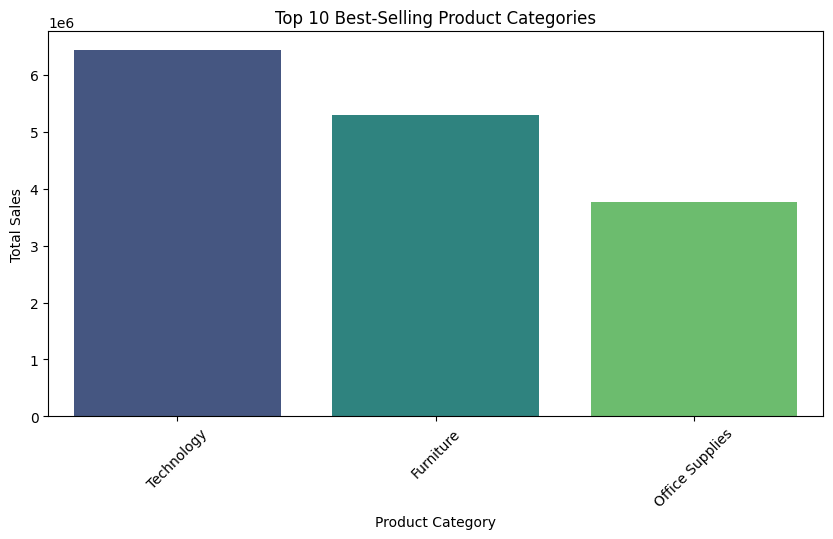

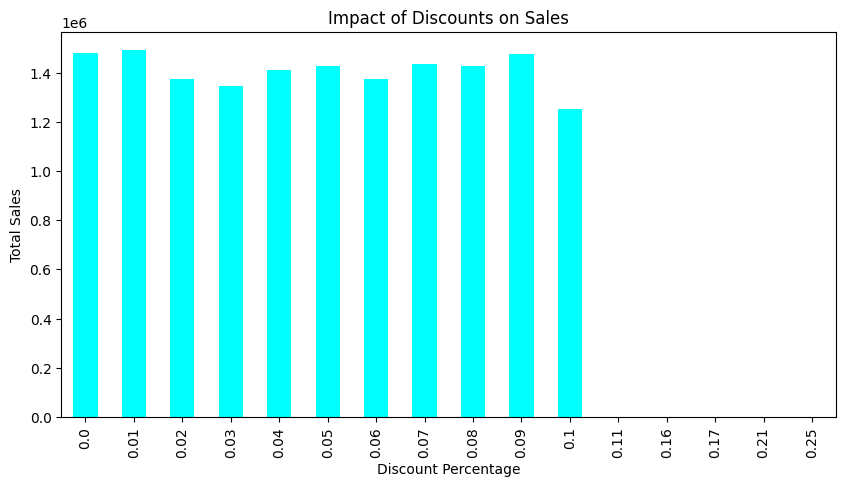

<ipython-input-13-0e3a0f51f2e9>:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')


KeyError: 'CustomerNAME'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Orders Data
orders = pd.read_csv("/content/ORDERS.csv", encoding='ISO-8859-1')

# Display column names to verify available fields
print("Available Columns:", orders.columns)

# Mapping existing column names to expected ones
column_mapping = {
    'ORDERQUANTITY': 'Quantity',
    'UNITPRICE': 'UnitPrice',
    'DISCOUNT': 'Discount',
    'ORDERDATE': 'OrderDate',
    'SHIPDATE': 'ShipDate',
    'PRODUCTCATEGORY': 'ProductCategory',
    'REGION': 'Region',
    'SHIPMODE': 'ShippingMode'
}
orders.rename(columns=column_mapping, inplace=True)

# Ensure required columns exist before proceeding
required_columns = ['Quantity', 'UnitPrice', 'Discount', 'OrderDate', 'ShipDate', 'ProductCategory', 'Region', 'ShippingMode']
missing_columns = [col for col in required_columns if col not in orders.columns]

if missing_columns:
    print(f"Missing Columns: {missing_columns}")
else:
    # 1. Sales Performance Analysis
    orders['Total_Sales'] = orders['Quantity'] * orders['UnitPrice']
    plt.figure(figsize=(10, 5))
    sns.barplot(x=orders.groupby('ProductCategory')['Total_Sales'].sum().nlargest(10).index,
                y=orders.groupby('ProductCategory')['Total_Sales'].sum().nlargest(10).values,
                palette='viridis')
    plt.title("Top 10 Best-Selling Product Categories")
    plt.xlabel("Product Category")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

    # 2. Discount Impact Analysis
    discount_impact = orders.groupby('Discount')['Total_Sales'].sum()
    plt.figure(figsize=(10, 5))
    discount_impact.plot(kind='bar', color='cyan')
    plt.title("Impact of Discounts on Sales")
    plt.xlabel("Discount Percentage")
    plt.ylabel("Total Sales")
    plt.show()

    # 3. Customer Churn Analysis
    orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')
    last_purchase = orders.groupby('CustomerNAME')['OrderDate'].max()
    inactive_customers = last_purchase[last_purchase < '2024-01-01'].count()
    print(f"Number of Inactive Customers (No Orders Since 2024): {inactive_customers}")

    # 4. Regional Sales Analysis
    regional_sales = orders.groupby('Region')['Total_Sales'].sum()
    plt.figure(figsize=(10, 5))
    regional_sales.plot(kind='bar', color='purple')
    plt.title("Sales by Region")
    plt.xlabel("Region")
    plt.ylabel("Total Sales")
    plt.show()

    # 5. Shipping Performance Analysis
    shipping_mode_count = orders['ShippingMode'].value_counts()
    plt.figure(figsize=(8, 5))
    shipping_mode_count.plot(kind='bar', color='red')
    plt.title("Shipping Mode Popularity")
    plt.xlabel("Shipping Mode")
    plt.ylabel("Count")
    plt.show()

    # 6. Order Fulfillment Efficiency
    orders['ShipDate'] = pd.to_datetime(orders['ShipDate'], errors='coerce')
    orders['Processing_Time'] = (orders['ShipDate'] - orders['OrderDate']).dt.days
    plt.figure(figsize=(8, 5))
    sns.histplot(orders['Processing_Time'], bins=20, kde=True, color='brown')
    plt.title("Order Processing Time Distribution")
    plt.xlabel("Processing Time (Days)")
    plt.ylabel("Order Count")
    plt.show()


Available Columns: Index(['ROWID', 'ORDERID', 'ORDERDATE', 'ORDERPRIOTORITY', 'ORDERQUANTITY',
       'SALES', 'DISCOUNT', 'SHIPMODE', 'PROFIT', 'UNITPRICE', 'SHIPPINGCOSTS',
       'CUSTOMERNAME', 'PROVINCE', 'REGION', 'CUSTOMERSEGMENT',
       'PRODUCTCATEGORY', 'PRODUCTSUBCATEGORY', 'PRODUCTNAME',
       'PRODUCTCONTAINER', 'PRODUCTBASEMARGIN', 'SHIPDATE', 'DATASET'],
      dtype='object')


<ipython-input-14-d964049ea41f>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders.groupby('ProductCategory')['Total_Sales'].sum().nlargest(10).index,


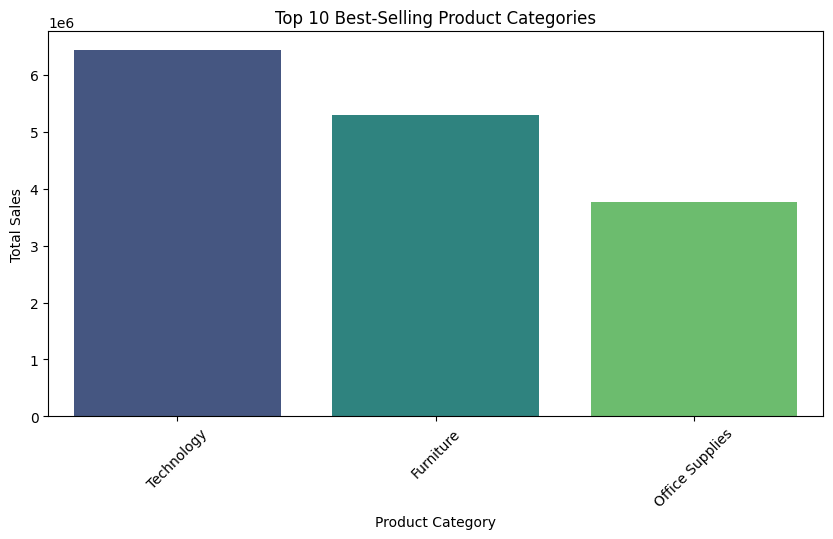

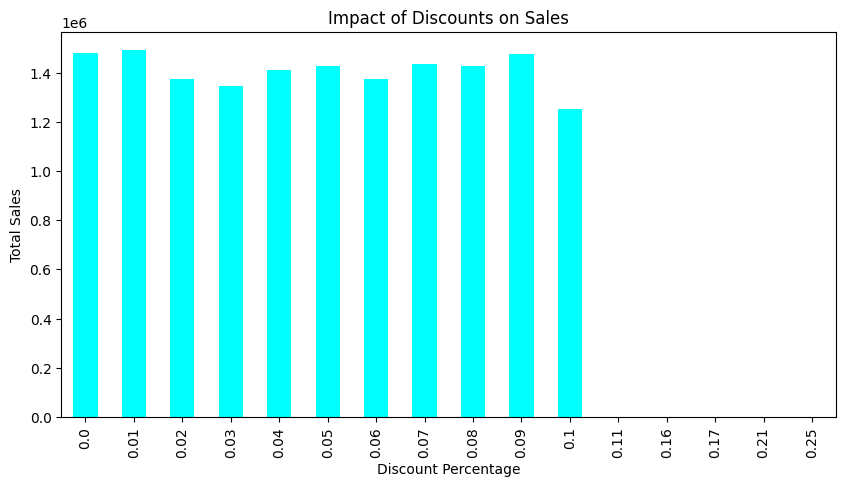

<ipython-input-14-d964049ea41f>:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')


Number of Inactive Customers (No Orders Since 2024): 795


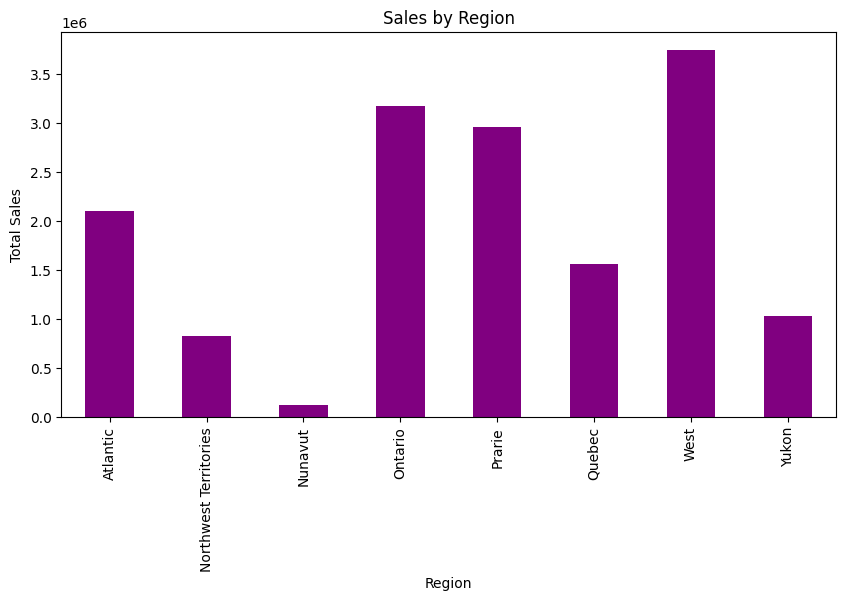

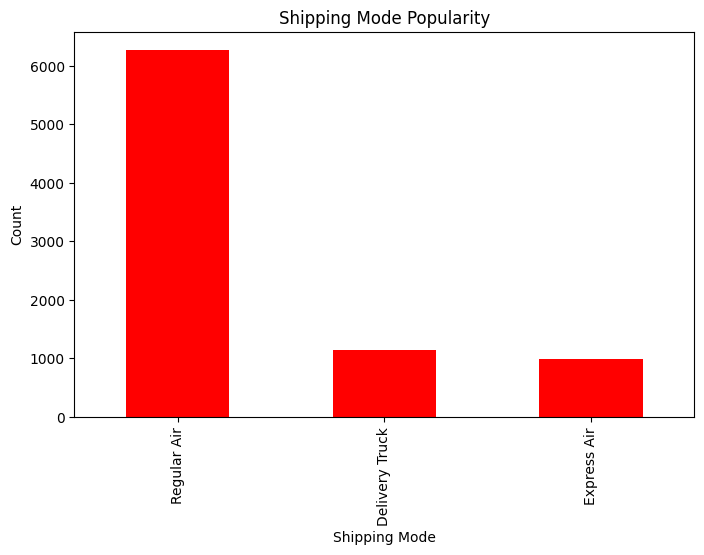

<ipython-input-14-d964049ea41f>:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['ShipDate'] = pd.to_datetime(orders['ShipDate'], errors='coerce')


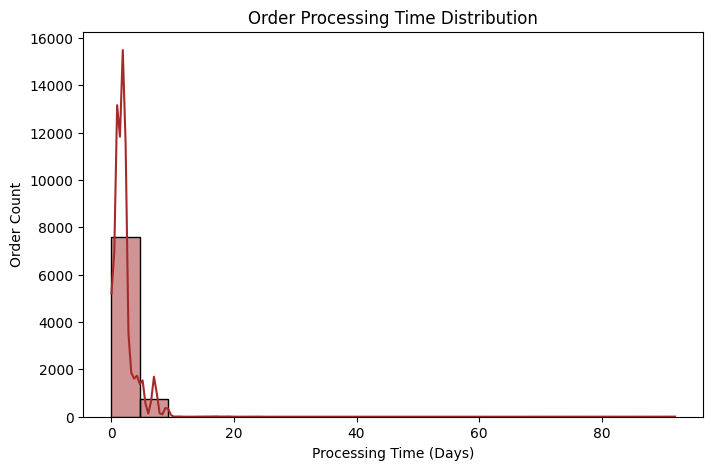

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Orders Data
orders = pd.read_csv("/content/ORDERS.csv", encoding='ISO-8859-1')

# Display column names to verify available fields
print("Available Columns:", orders.columns)

# Mapping existing column names to expected ones
column_mapping = {
    'ORDERQUANTITY': 'Quantity',
    'UNITPRICE': 'UnitPrice',
    'DISCOUNT': 'Discount',
    'ORDERDATE': 'OrderDate',
    'SHIPDATE': 'ShipDate',
    'PRODUCTCATEGORY': 'ProductCategory',
    'REGION': 'Region',
    'SHIPMODE': 'ShippingMode',
    'CUSTOMERNAME': 'CustomerName'
}
orders.rename(columns=column_mapping, inplace=True)

# Ensure required columns exist before proceeding
required_columns = ['Quantity', 'UnitPrice', 'Discount', 'OrderDate', 'ShipDate', 'ProductCategory', 'Region', 'ShippingMode', 'CustomerName']
missing_columns = [col for col in required_columns if col not in orders.columns]

if missing_columns:
    print(f"Missing Columns: {missing_columns}")
else:
    # 1. Sales Performance Analysis
    orders['Total_Sales'] = orders['Quantity'] * orders['UnitPrice']
    plt.figure(figsize=(10, 5))
    sns.barplot(x=orders.groupby('ProductCategory')['Total_Sales'].sum().nlargest(10).index,
                y=orders.groupby('ProductCategory')['Total_Sales'].sum().nlargest(10).values,
                palette='viridis')
    plt.title("Top 10 Best-Selling Product Categories")
    plt.xlabel("Product Category")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

    # 2. Discount Impact Analysis
    discount_impact = orders.groupby('Discount')['Total_Sales'].sum()
    plt.figure(figsize=(10, 5))
    discount_impact.plot(kind='bar', color='cyan')
    plt.title("Impact of Discounts on Sales")
    plt.xlabel("Discount Percentage")
    plt.ylabel("Total Sales")
    plt.show()

    # 3. Customer Churn Analysis
    orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')
    last_purchase = orders.groupby('CustomerName')['OrderDate'].max()
    inactive_customers = last_purchase[last_purchase < '2024-01-01'].count()
    print(f"Number of Inactive Customers (No Orders Since 2024): {inactive_customers}")

    # 4. Regional Sales Analysis
    regional_sales = orders.groupby('Region')['Total_Sales'].sum()
    plt.figure(figsize=(10, 5))
    regional_sales.plot(kind='bar', color='purple')
    plt.title("Sales by Region")
    plt.xlabel("Region")
    plt.ylabel("Total Sales")
    plt.show()

    # 5. Shipping Performance Analysis
    shipping_mode_count = orders['ShippingMode'].value_counts()
    plt.figure(figsize=(8, 5))
    shipping_mode_count.plot(kind='bar', color='red')
    plt.title("Shipping Mode Popularity")
    plt.xlabel("Shipping Mode")
    plt.ylabel("Count")
    plt.show()

    # 6. Order Fulfillment Efficiency
    orders['ShipDate'] = pd.to_datetime(orders['ShipDate'], errors='coerce')
    orders['Processing_Time'] = (orders['ShipDate'] - orders['OrderDate']).dt.days
    plt.figure(figsize=(8, 5))
    sns.histplot(orders['Processing_Time'], bins=20, kde=True, color='brown')
    plt.title("Order Processing Time Distribution")
    plt.xlabel("Processing Time (Days)")
    plt.ylabel("Order Count")
    plt.show()
